## Load and prepare data

Load the Iris dataset from `sklearn.datasets`, split it into training and testing sets, and scale the features.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train_scaled_df.head())
display(X_test_scaled_df.head())

## Implement knn and evaluate

Implement KNN classification for different values of K, evaluate the performance using appropriate metrics, and store the results.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

results = []

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_scaled_df, y_train)

    y_pred = knn.predict(X_test_scaled_df)

    accuracy = accuracy_score(y_test, y_pred)

    results.append({'K': k, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)

display(results_df)

## Integrate mlops

Log the parameters (K value) and metrics (performance) for each model training run using a simple logging mechanism.


In [1]:
import logging

logging.basicConfig(filename='knn_training.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import logging

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


logging.basicConfig(filename='knn_training.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting KNN model training for different K values.")

results = []
for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)


    knn.fit(X_train_scaled_df, y_train)

    y_pred = knn.predict(X_test_scaled_df)

    accuracy = accuracy_score(y_test, y_pred)
    logging.info(f"Training with K={k}, Accuracy: {accuracy:.4f}")

    results.append({'K': k, 'Accuracy': accuracy})

logging.info("Finished KNN model training.")

results_df = pd.DataFrame(results)

display(results_df)

,K,Accuracy
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


## Visualize results

Visualize the performance metrics for different K values to identify the optimal K.


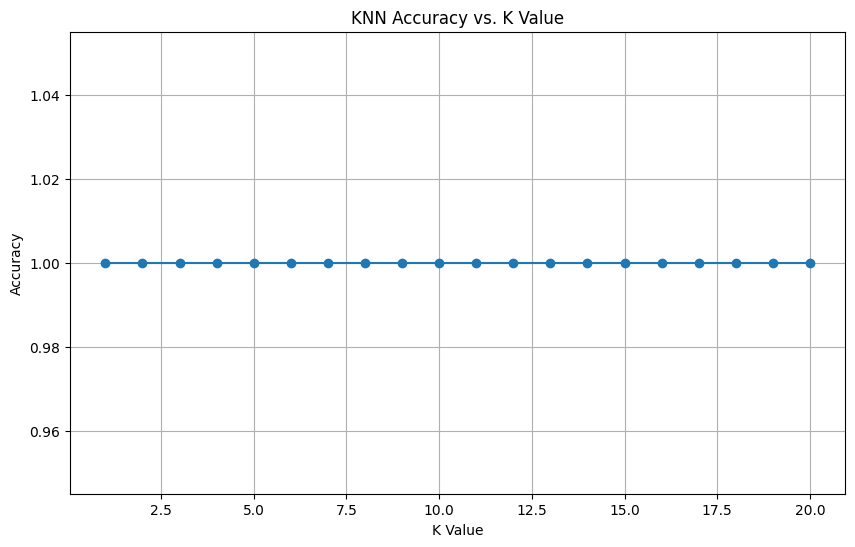

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o')
plt.title("KNN Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()